## Analysis: Lex Fridman Podcast

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

import re
import time

In [234]:
lexcast_df = pd.read_csv(r"C:\Users\Hiras\Analysis_Hiras\lexcast\output\lexcast_playlist.csv")
lexcast_df

,Title,Date,Length,Views
0,"John Danaher: Grappling, Jiu Jitsu, ADCC, and ...",2022-10-10,17318,181424
1,"GothamChess: Hans Niemann, Magnus Carlsen, Che...",2022-10-07,12798,351784
2,"Annaka Harris: Free Will, Consciousness, and t...",2022-10-05,9580,235480
3,"Michael Levin: Biology, Life, Aliens, Evolutio...",2022-10-01,10821,664082
4,Daniel Negreanu: Poker | Lex Fridman Podcast #324,2022-09-27,8488,466285
...,...,...,...,...
318,Vladimir Vapnik: Statistical Learning | Lex Fr...,2018-11-16,3242,58452
319,Yoshua Bengio: Deep Learning | Lex Fridman Pod...,2018-10-20,2538,104517
320,Steven Pinker: AI in the Age of Reason | Lex F...,2018-10-17,2273,88726
321,Christof Koch: Consciousness | Lex Fridman Pod...,2018-05-29,3474,190640


In [235]:
lexcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   323 non-null    object
 1   Date    323 non-null    object
 2   Length  323 non-null    int64 
 3   Views   323 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.2+ KB


In [236]:
# Regex Patterns to extract data from Title
pat1 = r'^[^:]*'
pat2 = r'[0-9]*$'
pat3 = r'(:.*?\|)'

# Since the topics require lot of cleaning, Included all the steps inside a function to be called in the Lambda function.
def topics(s):
    s = re.findall(pat3, s)
    s = s[0].replace(":", "").replace("|", "").rstrip().lstrip()

    # Removing those articles from the Topics
    if "and" in s or "the" in s:
        s = s.replace("and", "").replace("the", "")

    # Split topics into items in a list and remove white spaces
    s = s.split(",")
    s = [x.lstrip() for x in s]

    return s


lexcast_df["Guest Name"] = lexcast_df["Title"].apply(lambda x: re.findall(pat1, x)[0])
lexcast_df["Podcast Number"] = lexcast_df["Title"].apply(lambda x: re.findall(pat2, x)[0])
lexcast_df["Topics Discussed"] = lexcast_df["Title"].apply(lambda x: topics(x))

# lexcast_df

In [237]:
lexcast_df["Length(hh:mm:ss)"] = lexcast_df["Length"].apply(lambda x: time.strftime("%H:%M:%S", time.gmtime(x)))

lexcast_df = lexcast_df.sort_values(by=["Date"]).reset_index(drop=True)
lexcast_df

,Title,Date,Length,Views,Guest Name,Podcast Number,Topics Discussed,Length(hh:mm:ss)
0,Max Tegmark: Life 3.0 | Lex Fridman Podcast #1,2018-04-19,4978,231358,Max Tegmark,1,[Life 3.0],01:22:58
1,Christof Koch: Consciousness | Lex Fridman Pod...,2018-05-29,3474,190640,Christof Koch,2,[Consciousness],00:57:54
2,Steven Pinker: AI in the Age of Reason | Lex F...,2018-10-17,2273,88726,Steven Pinker,3,[AI in Age of Reason],00:37:53
3,Yoshua Bengio: Deep Learning | Lex Fridman Pod...,2018-10-20,2538,104517,Yoshua Bengio,4,[Deep Learning],00:42:18
4,Vladimir Vapnik: Statistical Learning | Lex Fr...,2018-11-16,3242,58452,Vladimir Vapnik,5,[Statistical Learning],00:54:02
...,...,...,...,...,...,...,...,...
318,Daniel Negreanu: Poker | Lex Fridman Podcast #324,2022-09-27,8488,466285,Daniel Negreanu,324,[Poker],02:21:28
319,"Michael Levin: Biology, Life, Aliens, Evolutio...",2022-10-01,10821,664082,Michael Levin,325,"[Biology, Life, Aliens, Evolution, Embryogenes...",03:00:21
320,"Annaka Harris: Free Will, Consciousness, and t...",2022-10-05,9580,235480,Annaka Harris,326,"[Free Will, Consciousness, Nature of Reality]",02:39:40
321,"GothamChess: Hans Niemann, Magnus Carlsen, Che...",2022-10-07,12798,351784,GothamChess,327,"[Hans Niemann, Magnus Carlsen, Cheating Scal &...",03:33:18


In [238]:
lexcast_df.isna().any()

Title               False
Date                False
Length              False
Views               False
Guest Name          False
Podcast Number      False
Topics Discussed    False
Length(hh:mm:ss)    False
dtype: bool

In [239]:
fig = px.line(lexcast_df, x="Date", y="Views", title='Views Over the Years')
fig

In [240]:
total_podcast_hrs= lexcast_df["Length"].sum() / 3600

avg_length = lexcast_df["Length"].sum() / lexcast_df["Length"].count()
avg_length = time.strftime("%H:%M:%S", time.gmtime(avg_length))

print(total_podcast_hrs.round())
print(avg_length)

717.0
02:13:09


More than <font size=10>700+</font> hours of Podcast 
And averge length of a podcast is <font size=10>02:13:09</font> (Data untill October 2022)

In [241]:
top_lexcast = lexcast_df.sort_values(by=["Views"], ascending=False)
top_lexcast = top_lexcast.iloc[0:20]
top_lexcast

,Title,Date,Length,Views,Guest Name,Podcast Number,Topics Discussed,Length(hh:mm:ss)
120,"David Fravor: UFOs, Aliens, Fighter Jets, and ...",2020-09-08,14184,6202719,David Fravor,122,"[UFOs, Aliens, Fighter Jets, Aerospace Enginee...",03:56:24
251,"Elon Musk: SpaceX, Mars, Tesla Autopilot, Self...",2021-12-28,9108,6072301,Elon Musk,252,"[SpaceX, Mars, Tesla Autopilot, Self-Driving, ...",02:31:48
294,"Joe Rogan: Comedy, Controversy, Aliens, UFOs, ...",2022-07-04,6081,5445731,Joe Rogan,300,"[Comedy, Controversy, Aliens, UFOs, Putin, CIA...",01:41:21
187,Vitalik Buterin: Ethereum 2.0 | Lex Fridman Po...,2021-06-03,10920,4386790,Vitalik Buterin,188,[Ereum 2.0],03:02:00
134,Dan Carlin: Hardcore History | Lex Fridman Pod...,2020-11-02,12085,4228479,Dan Carlin,136,[Hardcore History],03:21:25
274,"Michael Saylor: Bitcoin, Inflation, and the Fu...",2022-04-14,14214,4047304,Michael Saylor,276,"[Bitcoin, Inflation, Future of Money]",03:56:54
184,"Sam Harris: Consciousness, Free Will, Psychede...",2021-05-20,11840,3971978,Sam Harris,185,"[Consciousness, Free Will, Psychedelics, AI, U...",03:17:20
266,"Mark Zuckerberg: Meta, Facebook, Instagram, an...",2022-02-26,7213,3640050,Mark Zuckerberg,267,"[Meta, Facebook, Instagram, Metaverse]",02:00:13
152,"Avi Loeb: Aliens, Black Holes, and the Mystery...",2021-01-13,9831,3334168,Avi Loeb,154,"[Aliens, Black Holes, Mystery of Oumuamua]",02:43:51
287,Donald Hoffman: Reality is an Illusion - How E...,2022-06-12,11776,3311571,Donald Hoffman,293,[Reality is an Illusion - How Evolution Hid T...,03:16:16


In [242]:
fig2 = px.bar(top_lexcast, x="Guest Name", y="Views", title="Podcasts with Highest Views (Top 20)",
    hover_data=["Views", "Guest Name", "Date", "Topics Discussed"], text_auto='.2s', color="Views")

fig2.update_traces(textfont_size=12, textangle=1, textposition="outside", cliponaxis=False)
fig2.update_layout(height=600,xaxis_tickfont_size=9, uniformtext_minsize=8,
    uniformtext_mode='hide',xaxis_tickangle=-90)
    
fig2

In [243]:
lexcast_topics_df = lexcast_df[["Guest Name", "Topics Discussed", "Length", "Views", "Podcast Number"]].copy()
lexcast_topics_df = lexcast_topics_df.explode("Topics Discussed")
lexcast_topics_df

,Guest Name,Topics Discussed,Length,Views,Podcast Number
0,Max Tegmark,Life 3.0,4978,231358,1
1,Christof Koch,Consciousness,3474,190640,2
2,Steven Pinker,AI in Age of Reason,2273,88726,3
3,Yoshua Bengio,Deep Learning,2538,104517,4
4,Vladimir Vapnik,Statistical Learning,3242,58452,5
...,...,...,...,...,...
321,GothamChess,Cheating Scal & Chess Bots,12798,351784,327
322,John Danaher,Grappling,17318,181424,328
322,John Danaher,Jiu Jitsu,17318,181424,328
322,John Danaher,ADCC,17318,181424,328


In [244]:
# lexcast_topics_df["Topics Discussed"].value_counts().to_dict()

In [245]:
topics_text = " ".join(text for text in lexcast_df['Topics Discussed'].astype(str))

# Most topics contain the "'" this will apprea in the word cloud thus removing the "'"
topics_text = topics_text.replace("'", "") 

print("There are total of {} characters in the Lyrics column ".format(len(topics_text)))

There are total of 12628 characters in the Lyrics column 


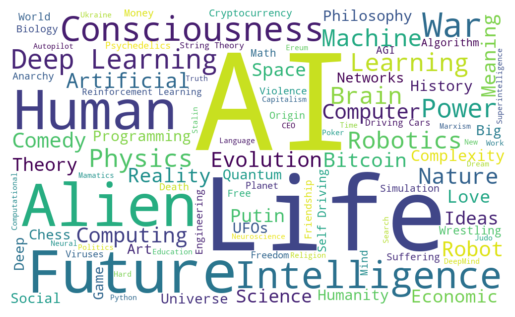

In [246]:
wordcloud = WordCloud(
    # stopwords=stopwords,
    background_color='white', width=1000, height=600,
    max_words=100
    ).generate(topics_text)

# plt.figure(figsize=(15,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [247]:
fig3 = px.histogram(lexcast_df, x='Views', nbins=100)
fig3.update_layout(bargap=0.1)
fig3

In [265]:

fig4 = px.histogram(lexcast_df, x='Length', nbins=100)
fig4.update_layout(bargap=0.1)
fig4

In [ ]:
fig5 = px.histogram(lexcast_df, x='Date', nbins=100)
fig5.update_layout(bargap=0.1)
fig5